<a href="https://colab.research.google.com/github/athi-raj/pythonInternship/blob/main/day3activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris.isna().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:
iris.isna().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


<Axes: xlabel='species', ylabel='count'>

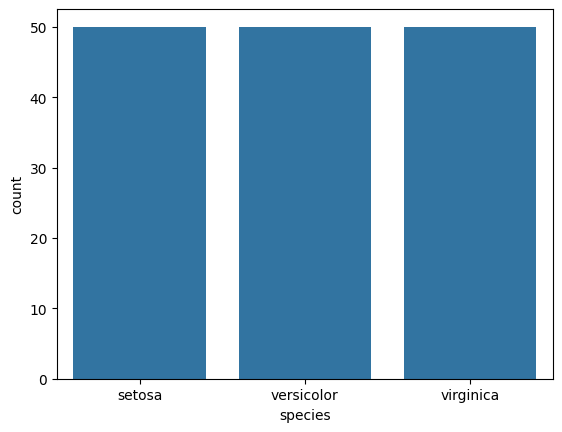

In [ ]:
sns.countplot(x="species", data=iris)

<Axes: >

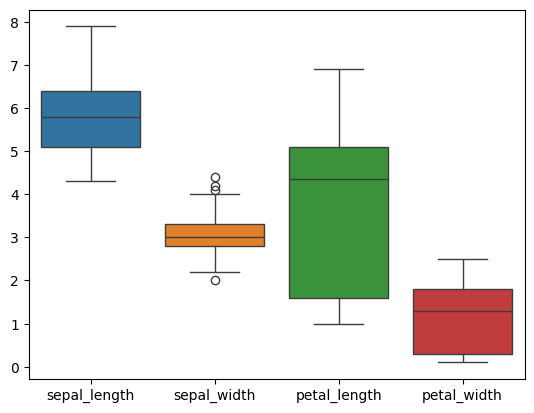

In [ ]:
sns.boxplot(data=iris)

<Axes: >

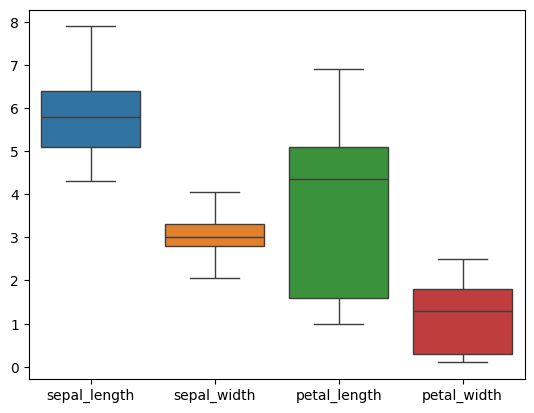

In [ ]:
r1 = iris["sepal_width"].quantile(0.25)
r3 = iris["sepal_width"].quantile(0.75)

IQR = r3-r1

lower_bound = r1-1.5*IQR
upper_bound = r3+1.5*IQR

iris["sepal_width"] = iris["sepal_width"].clip(lower_bound,upper_bound)
sns.boxplot(data=iris)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris["species"] = le.fit_transform(iris["species"])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
numcols = ["sepal_length","sepal_width","petal_length","petal_width"]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris[numcols] = scaler.fit_transform(iris[numcols])
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.051961,-1.340227,-1.315444,0
1,-1.143017,-0.127367,-1.340227,-1.315444,0
2,-1.385353,0.344364,-1.397064,-1.315444,0
3,-1.506521,0.108498,-1.283389,-1.315444,0
4,-1.021849,1.287827,-1.340227,-1.315444,0
...,...,...,...,...,...
145,1.038005,-0.127367,0.819596,1.448832,2
146,0.553333,-1.306696,0.705921,0.922303,2
147,0.795669,-0.127367,0.819596,1.053935,2
148,0.432165,0.816095,0.933271,1.448832,2


In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,150.000000
mean,-4.736952e-16,-6.158037e-16,-4.263256e-16,-4.736952e-16,1.000000
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,0.819232
min,-1.870024e+00,-2.368091e+00,-1.567576e+00,-1.447076e+00,0.000000
25%,-9.006812e-01,-5.990988e-01,-1.226552e+00,-1.183812e+00,0.000000
50%,-5.250608e-02,-1.273675e-01,3.364776e-01,1.325097e-01,1.000000
75%,6.745011e-01,5.802296e-01,7.627583e-01,7.906707e-01,2.000000
max,2.492019e+00,2.349222e+00,1.785832e+00,1.712096e+00,2.000000


<Axes: >

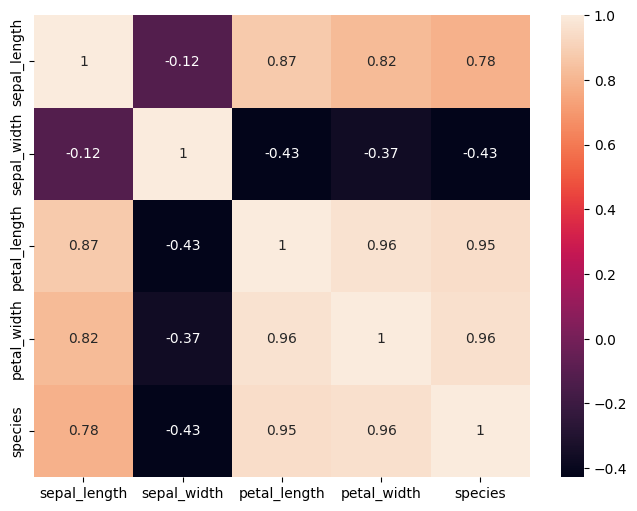

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(iris.corr(),annot=True)

In [ ]:
from sklearn.model_selection import train_test_split
y = iris["species"]
x = iris.drop(columns="species")

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

lr = LogisticRegression()

lr_model = lr.fit(x_train,y_train)
lr_pred = lr_model.predict(x_test)

print(accuracy_score(y_test,lr_pred))
print(confusion_matrix(y_test,lr_pred))
print(classification_report(y_test,lr_pred))

1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

